In [3]:
cd

C:\Users\LENOVO


In [4]:
cd harvard introduction to python for research

C:\Users\LENOVO\harvard introduction to python for research


In [5]:
cd Final_Project


C:\Users\LENOVO\harvard introduction to python for research\Final_Project


In [2]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
df = pd.read_csv("train_time_series.csv", index_col = 0)
labels = pd.read_csv("train_labels.csv", index_col = 0)
#add label column from labels to df
df["label"] = labels["label"]

In [212]:
#Steps in this Final Project:

#1. Train data import and smoothing

#import train data
#because the data is noisy (we can see by plotting x,y, and z), we will smooth train data using moving average of n window
#before that we will add the train labes into the train data, add column of avg. value of xyz,
#then we will drop na values and store as df_clean
#after that we will check correlation of avg. xyz vs. labels in the df, iterate values of n to give the largest correlation


#2. Choose our classification models based on accuracy
#check accuracy of classification models, choose classification models


#3. Import and smooth test data
#import test data
#smooth test data using moving average of len(testdata) * n / len(traindata) to presumably give highest correlation 
#between test labels and test xyz values


#4 fit model on test data

In [113]:
#we find by trial and error that using window average values of 115 gives us the highest correlation
#between avgxyz and label (0.595)
windowavg = 115
df_clean = pd.DataFrame({'timestamp': df['timestamp'], 'UTC time': df['UTC time'],'accuracy': df['accuracy'],\
                         'x': df['x'].rolling(windowavg, min_periods = 1).mean(),\
                         'y': df['y'].rolling(windowavg, min_periods = 1).mean(), \
                         'z': df['z'].rolling(windowavg, min_periods = 1).mean(),\
                        })
df_clean['avgxyz'] = df_clean.apply(lambda row: (row.x+row.y+row.z)/3, axis = 1)
df_clean['label'] = labels['label']
df_clean = df_clean.dropna(how = 'any')
df_clean.corr()

,timestamp,x,y,z,avgxyz,label
timestamp,1.000000,0.282007,-0.215823,-0.344453,-0.031185,0.126867
x,0.282007,1.000000,0.298336,0.374964,0.820709,0.550883
y,-0.215823,0.298336,1.000000,0.572264,0.718841,0.363516
z,-0.344453,0.374964,0.572264,1.000000,0.770942,0.417592
avgxyz,-0.031185,0.820709,0.718841,0.770942,1.000000,0.595132
label,0.126867,0.550883,0.363516,0.417592,0.595132,1.000000


In [191]:
def accuracy(estimator, X, y):
    predictions = estimator.fit(X, y).predict(X)
    return accuracy_score(y, predictions)




In [221]:
classification_outcome = df_clean['label']
covariates = df_clean[['x', 'y', 'z']]

#different classification models declared
logistic_regression = LogisticRegression()
forest_classifier = RandomForestClassifier(max_depth = 4, random_state=0)
svm_model_linear = SVC(kernel = 'linear', C = 1)
knn = KNeighborsClassifier(n_neighbors = 4) 
gnb = GaussianNB() #naive-bayesian classifier

#find the score for each model
logistic_regression_scores = cross_val_score(logistic_regression, covariates, classification_outcome, cv=20, scoring=accuracy)
forest_classification_scores = cross_val_score(forest_classifier, covariates, classification_outcome, cv=20, scoring=accuracy)
svm_scores = cross_val_score(svm_model_linear, covariates, classification_outcome, cv=20, scoring=accuracy)
knn_scores = cross_val_score(knn, covariates, classification_outcome, cv=20, scoring=accuracy)
gnb_scores = cross_val_score(gnb, covariates, classification_outcome, cv=20, scoring=accuracy)

#check accuracy of each model
print("logistic regression score: ", logistic_regression_scores)
print("forest classification score: ", forest_classification_scores)
print("svm score: ", svm_scores)
print("knn score: ", knn_scores)
print("gnb score: ",gnb_scores)

#we can see from the scores that forest classifier seems to overfit the train data, and later
#after plotting the results it seems that the naive bayesian classifier seems to filter out the noise best
#therefore we choose naive bayesian as our classifier


logistic regression score:  [0.52380952 0.52380952 0.52380952 0.52380952 0.52380952 0.52380952
 0.52380952 0.57894737 0.61111111 0.61111111 0.61111111 0.61111111
 0.61111111 0.58823529 0.58823529 0.58823529 0.58823529 0.58823529
 0.58823529 0.58823529]
forest classification score:  [1.         1.         1.         1.         1.         1.
 0.95238095 1.         1.         1.         1.         1.
 1.         0.94117647 1.         1.         1.         1.
 1.         1.        ]
svm score:  [0.52380952 0.52380952 0.52380952 0.52380952 0.52380952 0.52380952
 0.52380952 0.57894737 0.61111111 0.61111111 0.61111111 0.61111111
 0.61111111 0.58823529 0.58823529 0.58823529 0.58823529 0.58823529
 0.58823529 0.58823529]
knn score:  [1.         0.85714286 0.95238095 0.95238095 0.9047619  1.
 0.95238095 0.94736842 0.83333333 0.83333333 0.83333333 0.88888889
 0.77777778 0.70588235 0.82352941 0.88235294 0.82352941 0.82352941
 0.88235294 0.70588235]
gnb score:  [1.         1.         0.95238095 1.  

In [237]:
start_time = time.time()
#import test data
testdata = pd.read_csv("test_time_series.csv", index_col = 0)
test_labels = pd.read_csv("test_labels.csv", index_col = 0)

#assume that the best ratio of window average to the number of obervations for train data will work for test data as well 
testwindowavg = round(len(testdata) * windowavg / len(df))

testdatasmooth = pd.DataFrame({'timestamp': testdata['timestamp'], "UTC time": testdata['UTC time'],\
                               'accuracy': testdata['accuracy'],\
                               'x': testdata['x'].rolling(testwindowavg, min_periods = 1).mean(),\
                               'y': testdata['y'].rolling(testwindowavg, min_periods = 1).mean(), \
                               'z': testdata['z'].rolling(testwindowavg, min_periods = 1).mean() })

test_covariates = testdatasmooth[['x','y','z']]

classifier = gnb

classifier_on_test = classifier.fit(covariates, classification_outcome)
classifier_predictions = classifier_on_test.predict(test_covariates)
classifier_predictions = pd.Series(classifier_predictions, index = testdata.index)
classifier_predictions = classifier_predictions.astype(int)
test_labels['label'] = classifier_predictions
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.023984432220458984 seconds ---


--- 0.00799417495727539 seconds ---


In [230]:
test_labels.to_csv("test_labels_filled.csv")

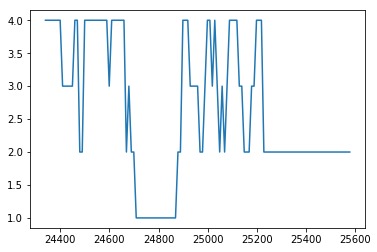

In [227]:
plt.plot(test_labels.label); #labels result

In [228]:
test_labels.groupby('label').count() #test results grouping

,timestamp,UTC time
label,,
1,17,17
2,50,50
3,20,20
4,38,38


In [229]:
np.array(test_labels['label']) #result

array([4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 2, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 4, 4, 3, 3, 3, 3, 2, 2, 3,
       4, 4, 3, 4, 3, 2, 3, 2, 3, 4, 4, 4, 4, 3, 3, 2, 2, 2, 3, 3, 4, 4,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

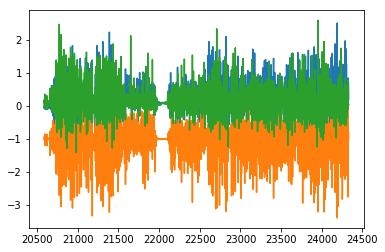

In [233]:
#original train data before smoothing

plt.plot(df['x']);
plt.plot(df['y']);
plt.plot(df['z']);


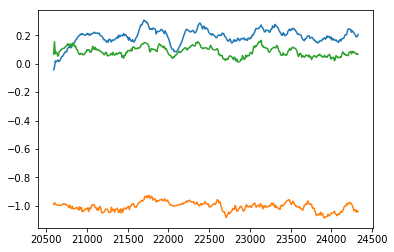

In [235]:
#train data after smoothing

plt.plot(df_clean['x']);
plt.plot(df_clean['y']);
plt.plot(df_clean['z']);